In [34]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

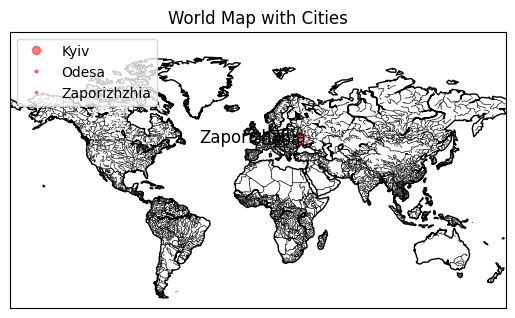

In [35]:

map = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90,
              llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Розмітка границь, річок та іншої географічної інформації
map.drawcoastlines()
map.drawcountries()
map.drawrivers()


cities = {
    'Kyiv': {'lat': 50.4501, 'lon': 30.5234, 'population': 2884000},
    'Odesa': {'lat': 46.4825, 'lon': 30.7233, 'population': 993120},
    'Zaporizhzhia': {'lat': 47.8388, 'lon': 35.1396, 'population': 765000}
}


for city, info in cities.items():
    x, y = map(info['lon'], info['lat'])
    map.plot(x, y, 'ro', markersize=(info['population'] / 500000), alpha=0.5, label=city)
    plt.text(x, y, city, fontsize=12, ha='right')


plt.legend(loc='upper left')

plt.title('World Map with Cities')
plt.show()

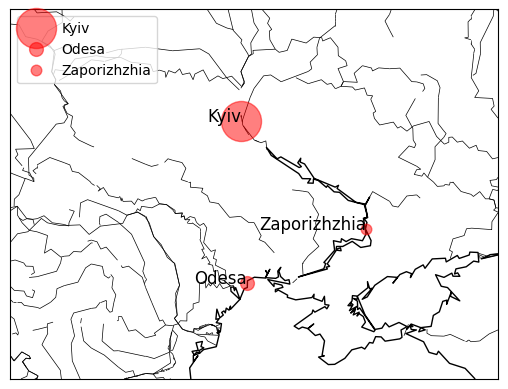

In [36]:
map = Basemap(projection='merc', resolution='l',
              llcrnrlat=44, urcrnrlat=53,
              llcrnrlon=22, urcrnrlon=40)


map.drawcountries()
map.drawrivers()
map.drawcoastlines()


cities = {
    'Kyiv': {'lat': 50.4501, 'lon': 30.5234, 'population': 2884000},
    'Odesa': {'lat': 46.4825, 'lon': 30.7233, 'population': 993120},
    'Zaporizhzhia': {'lat': 47.8388, 'lon': 35.1396, 'population': 765000}
}


for city, info in cities.items():
    x, y = map(info['lon'], info['lat'])
    map.plot(x, y, 'ro', markersize=(info['population'] / 100000), alpha=0.5, label=city)


for city, info in cities.items():
    x, y = map(info['lon'], info['lat'])
    plt.text(x, y, city, fontsize=12, ha='right')

plt.legend(loc='upper left')
plt.show()


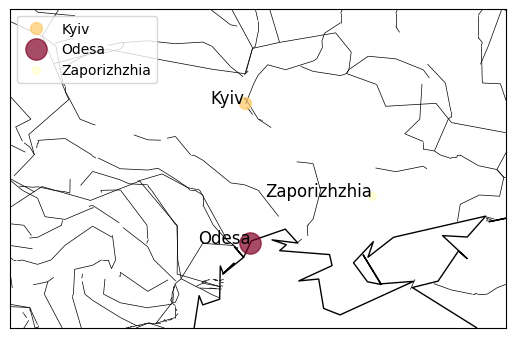

In [37]:
from matplotlib.colors import Normalize
from matplotlib import cm


map = Basemap(projection='mill', llcrnrlat=44, urcrnrlat=53,
              llcrnrlon=22, urcrnrlon=40, resolution='c')


map.drawcoastlines()
map.drawcountries()
map.drawrivers()


cities = {
    'Kyiv': {'lat': 50.4501, 'lon': 30.5234, 'population_density': 3442},
    'Odesa': {'lat': 46.4825, 'lon': 30.7233, 'population_density': 6131},
    'Zaporizhzhia': {'lat': 47.8388, 'lon': 35.1396, 'population_density': 2293}
}


population_densities = [city_info['population_density'] for city_info in cities.values()]


norm = Normalize(vmin=min(population_densities), vmax=max(population_densities))
colors = [cm.YlOrRd(norm(city_info['population_density'])) for city_info in cities.values()]

for (city, info), color in zip(cities.items(), colors):
    x, y = map(info['lon'], info['lat'])
    marker_size = info['population_density'] / 400
    map.plot(x, y, 'o', markersize=marker_size, color=color, alpha=0.7, label=city)
    plt.text(x, y, city, fontsize=12, ha='right')


plt.legend(loc='upper left')
plt.show()

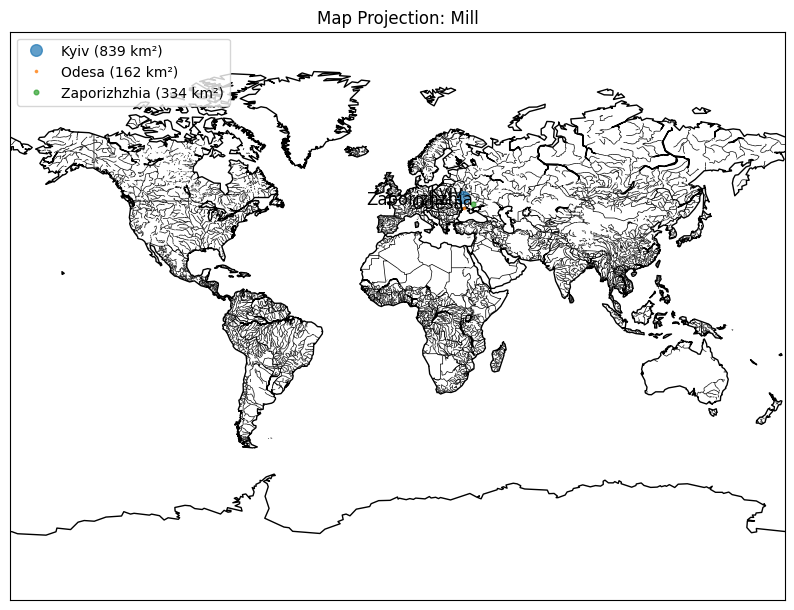

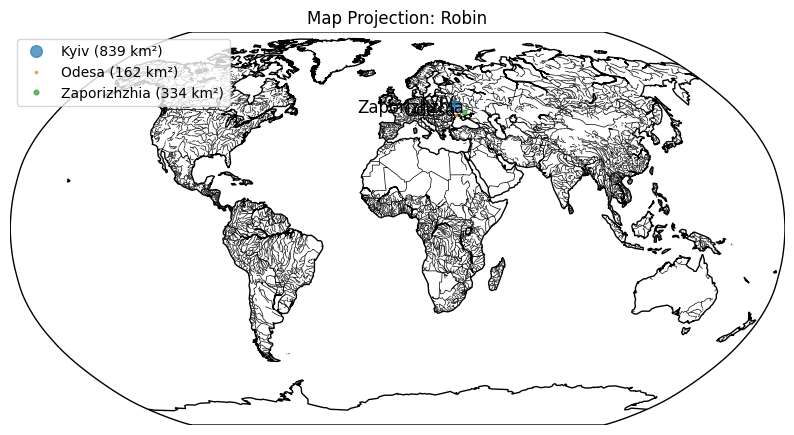

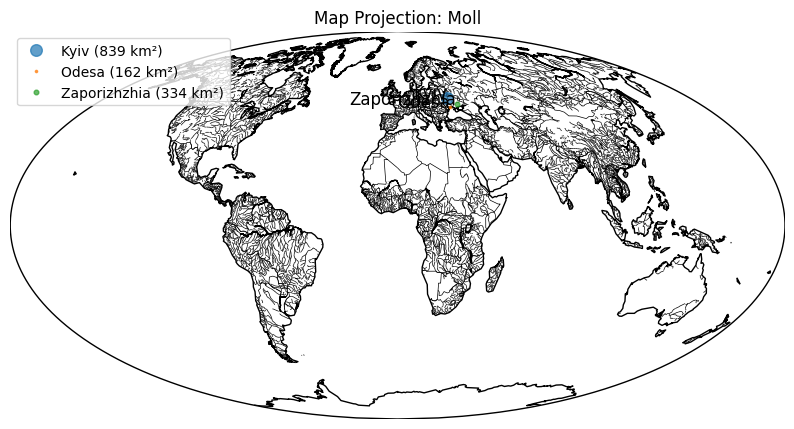

In [38]:

cities = {
    'Kyiv': {'lat': 50.4501, 'lon': 30.5234, 'area': 839},
    'Odesa': {'lat': 46.4825, 'lon': 30.7233, 'area': 162},
    'Zaporizhzhia': {'lat': 47.8388, 'lon': 35.1396, 'area': 334}
}


projections = ['mill', 'robin', 'moll']


for projection in projections:
    plt.figure(figsize=(10, 8))
    map = Basemap(projection=projection, resolution='c', lon_0=0)
    map.drawcoastlines()
    map.drawcountries()
    map.drawrivers()


    for city, info in cities.items():
        x, y = map(info['lon'], info['lat'])
        marker_size = info['area'] / 100
        map.plot(x, y, 'o', markersize=marker_size, alpha=0.7, label=f"{city} ({info['area']} km²)")
        plt.text(x, y, city, fontsize=12, ha='right')

    plt.title(f'Map Projection: {projection.capitalize()}')
    plt.legend(loc='upper left')
    plt.show()

In [39]:
import folium

kovel_coords = [51.2116, 24.7107]
kovel_population = 62557

kovel_map = folium.Map(location=kovel_coords, zoom_start=12)

folium.Marker(
    location=kovel_coords,
    popup=f'Ковель, Населення: {kovel_population}',
    icon=folium.Icon(color='blue')
).add_to(kovel_map)
kovel_map.save('kovel_map.html')
kovel_map